In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei', 'Arial']})
%matplotlib inline
# plt 中文
plt.rcParams['font.sans-serif']=['Arial Unicode MS']
df = pd.read_csv('lianjia.csv')
df.head(2)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988


In [ ]:
# 特征工程

# 移除结构类型异常值
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

df['Renovation'] = df.loc[(df['Renovation']!='南北'), 'Renovation']

df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator']='有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator']='无电梯'

# 只考虑室和厅
df=df.loc[df['Layout'].str.extract('^\d(.*?)\d.*?') == '室']

df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')

# 对 Year 进行分箱
df['Year'] = pd.qcut(df['Year'],8).astype('object')

# Direction 

d_list_one=['东'，'西', '南', '北']
d_list_two = ['东西', '东南', '东北', '西南', '西北', '南北']
d_list_three = ['东西南', '东西北', '东南北', '西南北']
d_list_four = ['东西南北']

def direct_func:
    return

df['Direction'] = df['Direction'].apply(direct_func)
df = df.loc[(df['Direction']!='no')&(df['Direction']!'nan')]

# 创建新特征
df['Layout_total_num'] = df['Layout_room_num'] + df['Layout_hall_num']
df['Size_room_ratio'] = df['Size']/df['Layout_total_num']

df = df.drop('Layout', 'Garden')


In [22]:
df = df[(df['Layout']!='叠拼别墅')&(df['Size']<1000)]

df['Renovation'] = df.loc[(df['Renovation']!='南北'), 'Renovation']

df['Elevator'] = df.loc[(df['Elevator'] == '有电梯')|(df['Elevator'] == '无电梯'), 'Elevator']
df.loc[(df['Floor']>6)&(df['Elevator'].isnull()), 'Elevator']='有电梯'
df.loc[(df['Floor']<=6)&(df['Elevator'].isnull()), 'Elevator']='无电梯'

df.head(10)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,无电梯,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,有电梯,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,2003
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,1992
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,1999
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,2003
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,2002


In [23]:
df['Layout'].value_counts()

2室1厅      9485
3室1厅      3999
3室2厅      2765
1室1厅      2681
2室2厅      1671
4室2厅       930
1室0厅       499
4室1厅       295
5室2厅       200
2房间1卫      170
1房间1卫      146
3房间1卫      116
4室3厅        96
5室3厅        75
1室2厅        67
6室2厅        59
3房间2卫       53
2室0厅        50
3室3厅        43
4房间2卫       31
3室0厅        29
6室3厅        29
5室1厅        27
2房间2卫       18
4房间1卫       15
1房间0卫       14
5房间2卫       10
4房间3卫        7
7室3厅         7
5房间3卫        6
7室2厅         6
2室3厅         5
6室4厅         4
4室4厅         4
8室3厅         4
5室4厅         4
8室2厅         3
4室0厅         3
6房间4卫        3
3房间0卫        3
1房间2卫        2
3房间3卫        2
2房间0卫        2
6房间3卫        2
6室0厅         2
5室0厅         1
5房间0卫        1
7室1厅         1
9室3厅         1
8室5厅         1
6房间5卫        1
6室5厅         1
11房间3卫       1
8室4厅         1
9室2厅         1
6室1厅         1
7房间2卫        1
1室3厅         1
9室1厅         1
Name: Layout, dtype: int64

In [25]:
# Layout 特征处理
df['Layout'] = df.loc[(df['Layout'].str.extract('^\d(.*?)\d.*?', expand=False) == '室'), 'Layout']
df.head(10)
# df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
# df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')

# df.head(10)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,无电梯,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,有电梯,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,2003
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,1992
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,1999
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,2003
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,2002


In [26]:
df['Layout'].value_counts()

2室1厅    9485
3室1厅    3999
3室2厅    2765
1室1厅    2681
2室2厅    1671
4室2厅     930
1室0厅     499
4室1厅     295
5室2厅     200
4室3厅      96
5室3厅      75
1室2厅      67
6室2厅      59
2室0厅      50
3室3厅      43
6室3厅      29
3室0厅      29
5室1厅      27
7室3厅       7
7室2厅       6
2室3厅       5
4室4厅       4
8室3厅       4
5室4厅       4
6室4厅       4
8室2厅       3
4室0厅       3
6室0厅       2
5室0厅       1
1室3厅       1
6室1厅       1
8室4厅       1
9室2厅       1
6室5厅       1
8室5厅       1
7室1厅       1
9室3厅       1
9室1厅       1
Name: Layout, dtype: int64

In [33]:
df = df[(df['Layout'].notnull())]
# df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
# df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64') 
df.head(10)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,无电梯,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,有电梯,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,2003
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,1992
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,1999
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,2003
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,2002


In [35]:
df['Layout_room_num'] = df['Layout'].str.extract('(^\d).*', expand=False).astype('int64')
df['Layout_hall_num'] = df['Layout'].str.extract('^\d.*?(\d).*', expand=False).astype('int64') 
df.head(10)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year,Layout_room_num,Layout_hall_num
0,东西,灯市口,无电梯,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988,3,1
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988,2,1
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996,3,1
3,南,崇文门,有电梯,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004,1,1
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010,2,2
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,2003,2,1
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,1992,1,1
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,1999,2,1
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,2003,3,2
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,2002,2,2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23052 entries, 0 to 23676
Data columns (total 14 columns):
Direction          23052 non-null object
District           23052 non-null object
Elevator           23052 non-null object
Floor              23052 non-null int64
Garden             23052 non-null object
Id                 23052 non-null int64
Layout             23052 non-null object
Price              23052 non-null float64
Region             23052 non-null object
Renovation         23052 non-null object
Size               23052 non-null float64
Year               23052 non-null int64
Layout_room_num    23052 non-null int64
Layout_hall_num    23052 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 2.6+ MB


In [37]:
#Year 特征
df['Year'] = pd.qcut(df['Year'], 8).astype('object')

In [38]:
df['Year'].value_counts()

(2000.0, 2003.0]      3705
(2004.0, 2007.0]      3369
(1990.0, 1997.0]      3110
(1949.999, 1990.0]    3024
(1997.0, 2000.0]      2829
(2010.0, 2017.0]      2687
(2007.0, 2010.0]      2571
(2003.0, 2004.0]      1757
Name: Year, dtype: int64

In [39]:
# Direction

df['Direction'].value_counts()

南北        11367
南          2726
东西         1388
东南         1311
西南         1094
东           843
西           802
西北          733
东北          645
北           484
东南北         465
南西北         370
南西          158
东西北         139
东南西         133
西南北         124
东南西北         90
西南东北         23
南东北          19
东南西南         15
东南南          13
西东北          10
西南西北         10
东东南          10
东西南           9
南西南           9
东南东北          7
西南西           5
东南南北          5
东西南北          3
南西东北          3
南西南北          2
南西南西          2
西西南           2
南西北北          2
西北北           2
南东            2
东北东北          2
东东北           2
西北东北          2
西西北           2
南西西北          2
东南北西          1
东南西北北         1
南北东北          1
东南西南东北        1
东西东北          1
东南西北东北        1
南北东           1
南北西           1
东南南西北         1
东西北东北         1
东南西南北         1
东西北北          1
西南西北北         1
北西            1
东东南南          1
西南西北东北        1
北南            1
Name: Direction, dtype: int64

In [41]:
# Direction 

d_list_one=['东','西', '南', '北']
d_list_two = ['东西', '东南', '东北', '西南', '西北', '南北']
d_list_three = ['东西南', '东西北', '东南北', '西南北']
d_list_four = ['东西南北']

def direct_func(data):
    print(data, len(data))
    pass
#     return data

df['Direction'].apply(direct_func)
# df['Direction'] = df['Direction'].apply(direct_func)
# df = df.loc[(df['Direction']!='no')&(df['Direction']!'nan')]

东西
南北
南西
南
南
南北
南
南
南北
东北
南
南
西
西
西南
东
西北
西南
北
南北
南北
西北
南北
南北
南
西
南北
东西
南北
南北
南西南
南北
南北
南北
西南西北
西南
东西
东西
西南
南北
西
南北
南北
西
东南
南北
南北
南
东北
南
南北
东
南北
南北
西南东北
西南
南
东
南北
西
南北
南北
东西
西北
南北
东西
南北
西南
南北
南北
南北
南
南北
南北
南北
东西北
南北
南
南北
西北
西南
东
南北
南北
东南
南
东北
东北
西南
南
南北
南北
南西
东南
南北
东北
西北
西南
南北
南北
东南北
南北
南
南
南北
南北
南北
南北
东南
东南
南北
南
东西
西
南北
南北
南
北
南北
南
东西北
东
南北
北
南北
南北
南北
西南
南北
南北
南北
西
南北
南北
南北
南北
南北
南北
南北
南北
南
南北
东西
南北
东南北
南北
南北
南北
南
南
南北
北
东西
南北
东北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
东南北
南北
南北
南北
南北
南北
南北
南北
东北
南北
南北
南北
南北
南北
西北
南北
南北
南北
南北
南北
南北
南北
南西北
南北
南
南北
南
南北
南北
南北
南西北
南北
南北
南北
南北
南北
南北
南北
南北
西北
南
南北
东南南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
东南北
南
南北
南
东
南北
南
南北
东西
南北
南
南北
南北
南北
南北
南北
南北
南北
南北
南北
南
南
南
南北
南北
南北
南西北
南
南
南北
东
南北
南北
南西北
南北
南北
南北
南北
南北
南北
南北
南北
南北
东西
南北
南北
南
北
南北
东西
南北
南北
南北
南北
南
南北
南
南北
南北
南北
南北
南北
南北
南北
南
南北
东南
南北
南
南北
东西
南北
南
南
东西
南
西南
南北
东南北
北
南北
南北
东西
南北
南北
南北
东
南北
南北
南北
南
西
南
南北
南北
南北
南西北
东北
南北
南北
南北
南
南北
南北
南北
南北
南北
南北
南北
南北
南北
西
南北
东西
南北
南北
南北
南北
东西
南
南北
南北
南北
南北
南北
西北
南

南北
南北
南
南北
东西
南北
南
南北
南北
南西北
东南北
南西
南北
东南西北
南北
南北
西北
南北
南北
南北
南北
南北
南北
南北
东
南北
南北
南
东西
南北
西南
南北
南北
南北
南北
南北
南北
南西
南北
南北
东南西北
南
东南北
东西
南北
南北
南
南
东西
东北
南西北
南北
南北
南北
东西
东西
南北
东西
南北
西北
南北
南北
南北
南北
南西北
南北
南北
南北
南北
南北
南北
南北
西北
南北
南北
南北
南北
南北
东南
南
南北
南北
南北
西北
东南西北
南西
南
东南北
南北
东西
南北
南北
南北
南北
南
南北
东西
东西
南北
南北
东
南北
南北
南北
南北
南北
东西
南北
东南
东西
南北
南
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南
南北
南北
南
南
南
东西北
南北
南北
南北
南北
西南
南北
南北
南北
南北
东北
南北
南北
南北
南北
南北
南北
南
南北
南
南
南北
东南
东西
南北
南北
南西北
南北
东西
南北
南北
南北
西北
东西北
东南北
南北
南北
东西
南北
南北
东南北
东南北
西
南北
南北
东南北
南北
西北
南
南
南
南
南
东西
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
东
南北
南北
南
南北
南北
南北
南北
南
南北
东南
东南北
南北
南北
南
南北
南北
东南北
西北
南北
南北
南北
东南北
南
南北
南北
东西
西
南北
东南北
南北
东西
南北
东西
南北
南北
南北
南北
东南
南北
南北
南北
南北
南北
南北
东西
东西
南北
南
南
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南
南北
东
南
南北
东西
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
西南
南北
南北
东西
南北
东西
南北
南北
南北
南北
西南
西
南北
东北
南北
南
南北
南北
南北
东南
南北
南北
南北
东西
东
东西
南
南北
南北
南北
南北
南
南北
南北
南北
南北
东南
南北
南北
东北
南西北
南北
南北
东西
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
西北
南
西北
东西
南
南北
南北
南


南北
东西
南北
南北
东南
西南
南北
南北
南北
南北
南
南北
南北
南北
南北
南北
东
南北
南西
南
南北
南北
南北
南
南北
南北
南北
南
南北
东西
南北
东南西
南北
南北
南北
南北
西南
南北
东南北
南北
西
东南
东
南北
南北
南北
东西
南北
北
西
南北
南北
南北
南北
南北
南北
南
南北
东南
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
东南北
南北
东南
南北
北
南北
南北
东南北
南北
东西
南北
南北
东南
南北
东西
南北
南北
南北
南北
南
西北
南北
南
南北
南北
南
南北
南北
南北
南北
南北
南北
南北
西南
南北
北
南北
南北
南北
东南
东西
南
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
西南
东西
南北
南北
南北
西
东西
南北
东南
西南
东南南北
南北
南北
南
南北
南北
南北
南北
南北
东南北
北
南北
南北
南西
南
南北
南北
北
南北
南
南
南北
东南
南北
南北
南西北
东西
南
东西
南北
南北
南
西南
西北
南北
南北
东西
西北
南北
南北
东
南北
南
北
西北
南北
南北
南北
南北
南北
西南
南北
北
南北
南北
南北
南北
南北
南北
东西
东
南北
南北
南北
南北
南北
东西
南北
南北
西北
北
东
南西北
北
南北
南
西
南北
南北
南北
南北
南北
南北
西北
南
南西北
南北
南北
东北
东南西
西
南北
西北
南北
南北
南
东西
西北
南
南北
南
南北
南北
东西
南北
南北
南
南北
南北
南北
南北
南北
南北
东
南北
西
南
南北
东西
东西
南北
南
南
东
南
南
南
南北
东西
南北
南北
南北
东
南西北
南北
南北
东西
西北
东南
南北
南北
南
南北
南北
南北
东南北
南
东西北
南北
东南
南北
南北
南北
南
南北
南北
南
南北
南北
南
南北
南西
南西北
南
东南
南北
南北
东西
南北
东西
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
东南北
东
东南西
东北
南北
南北
北
南北
南西
东南
南北
南北
南北
西北
北
南
南西
西北
南
南北
南
南北
西
东西
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北
南北


南北
东南
西南
南北
南北
南北
南北
西北
南北
南北
南北
西南
东西
南北
东北
南
南北
南
西南
东西
西南
南北
东南北
西北
西北
西南
东西
南北
东南
东西
南
西北
东西
南北
南北
东南
东南
南北
南
南北
南北
东南
南西北
东南
南北
东西
南北
东北
西
东西
东南
东
南西北
西南
东
南北
东
西南
南北
南北
南北
东
南北
东西
东
西南
南北
南北
东西
南
南北
南北
东南
南北
南
南北
南北
东南
南
南
南西北
西北
南北
南
南北
西南
东南
南北
南北
西
南
南
南
南
南
西
西南
南北
东
南
南北
北
北
南北
南北
南西北
西
北
南北
北
南
西南
南北
东南
南北
西
南
南
西北
东
西
东南
南北
东南
西南
东南
东南
南
北
南
南北
东南西南
南
东南
南北
南北
东西北
东西北
南
南北
南北
北
西北
南
西
东北
东西
南北
南
南
东
南
南北
西南
西北
南北
南
南北
东西
南
南北
南
南北
南北
东南北
西北
东西
东南
西
东
西南
南
南
东南
南北
南北
东南
南北
东南
东南
东北
南北
东南
东西
南北
南
西北
南北
南
南北
南北
南
东西
南北
南北
南
东南
东南北
东南
西
东北
南西北
西北
南北
南北
南北
东南
西南
南
西南
南北
西北
西南
西北
南北
南北
东西
南北
南
南西北
南北
南北
东西
西南
南北
西南
南北
西南北
西南
南
南北
南北
南北
东北
西南
南
东
东北
南北
东南
东南
南北
南北
东南
东北东北
东西
西
西北
东南北
南北
南北
南
东北
西南北
南北
南西北
东北
南
南
东南
南北
南北
南北
西南北
西西北
南西北
东北
东西
南北
西北
东西
南
南北
东西
西
南北
东南
东北
南北
南北
南北
南北
西南
南北
北
东南北
东南
南
西北
西南北
东北
南
西南
南北
南北
东南
东北东北
东北
西
南北
东南
东南
东北
南北
西北
西南
南北
南
南北
西
西南北
西南北
西南
东西
南北
东南
南北
南北
南北
西北
南
南
北
东南
南西北
南
东南
西北
东西
西
西
南北
西南
南北
南
西北
东
西南
东北
南
西
南北
南北
南北
南北
南北
南
南北
南
东西
东南
南北
西北


东南北
南西
东南
北
南
西
西北
南
东南
东
西
东西
东南
南北
西北
东南
南北
南
东西
西南
南北
西
东南北
南
北
南北
东南
南北
西北
南
东
东南北
东北
东南
南北
东北
西
南
西南
西北
南北
南北
东南北
西北
南
南
南北
西北
北
南
南北
东北
南北
东南
西南
南北
南北
西南
东西北
东南
南北
东南
南北
南北
东南
东南
东北
南西
东南
南
东
北
北
西南东北
东南西
南北
东南北
北
西南
南北
南
东
东南
东南西
南北
东西
南北
南北
南北
西北
南北
南
东南
南北
东南
南北
东
南北
西南
西北
南北
南
西南
东南
西
西南
北
南北
南北
南
西南
西
东西
西南
南北
西南
南北
北
南北
南
南北
东
南北
西南北
南北
南
南北
南北
东北
南北
南北
东南
西南北
南
东北
南北
南北
南北
东南北
南北
南北
东西
东南
东南
西北
西南
西南
南北
南
西
南北
南北
南北
南
南北
南北
西南北
南北
南北
南北
东南西北
东北
南北
东南
南北
南北
南北
东
北
南
南北
东北
南北
东南西
西北
东西北
西南
南北
南北
南北
南北
西北
南北
东南
北
南北
南北
东西
南北
东南
东西
东
东北
东南
南北
南北
南
西南
西
西北
西南
东南
西南北
北
南
南北
南北
南
南
西南
东南
东西
南北
南北
南北
西
东南西
西北
南北
南
南北
东南
东南北
东西北
西南
南北
东南
西南
南北
南北
东西
东南
北
南
西
南北
南北
西南
南北
东南西北
南北
南北
南北
南
南北
南北
西
南北
东南西北
东
东西
东西
东北
东西
南北
东西
南
西南北
东
北
西
北
西
西南
南北
南西
南北
南北
西
东
西南
西
南
西南北
南北
西南
西南
西南
南
东南
东南
南
南北
南北
西
西南北
南北
东南
东南北
南
南北
南北
西南
西南
南北
西南
南
南
南北
西南
南北
东南北
南
东南
南北
南北
东南东北
北
东南
北
南
南北
西南
东南
西南西北
南北
南
北
西北
东
西
东南
西北
东南
西北
南西南
南北
西南
东北
东南
南北
南北
南北
南
南
西南
东西
西南
西南
西北
东西
东南
南北
东南南
南北
南
西南
西南
西南
南


南北
南
南北
东西
南北
西南
南
南
东南
南北
南北
北
南西北
北
南北
南
西
东西北
东西
南北
南北
南
南北
东南
西
东南北
南
北
西北
东南
东南
南北
南北
东南西
西南
东
南
南北
西
北
南北
南
西
南北
南北
东南
东西
南
东西
南北
东北
南北
北
南北
南
南北
东西
南北
南北
东南
南北
南北
南北
南
东
东
南
南
西
南北
东
西
东南
东北
东南
东
东西
南北
西北
东西
东西北东北
南
西
东
西
北
东北
南北
东
北
西
南
南北
西北
西南
南
西北
南北
东西
东西
南北
东南西
西南
南北
东西
东
东西
东西
西南
东西北
南北
西
东西
南北
南北
西北
东西
南西西北
南北
西北
东南北
东西
南北
南北
西
西
西北
东西
东
西
西北
南北
东南西
东
西北
东西
东南
东北
南北
西
南
东西北
北
北
东北
西
东北
东西北
南北
西
南北
东西
东
东
东
东西北
南北
南北
南北
东西北
南北
东
东南西北
南
东南西
南
东
南
南北
东南北
东南
南北
东南北
南西西北
东西
南北
南
东
南
东南北
西南
西北
东
东
西南北
西南北
东
南北
东西
北
东南
南北
南北
东南西
东南北
南北
南北
南
东北
南北
南北
西
东北
南北
南北
西北
南
南
南北
北
东西
南
南西
南北
东
南
南北
南北
南北
西北
东西北
南
南北
南
东
南
北
南西北
南
北
西
南北
东北
南北
南
南北
南北
东西
东北
南
南北
西
南西北
东
东东南
南
西北
东西
南
南北
东
南
南北
西
南北
南北
北
西
西南
南
东南东北
西
南北
南北
西北
西南
南北
南北
南北
东
南北
东西
西南
南
南北
东西
西北
东北
西北
南北
南北
南北
东北
南
东南北
东西
东
南西
西南
南
南北
南
东
东西
东南北
西北
北
东西
东南
南
南东北
东北
东东南
东西
南
西北
南北
东南
南北
南北
南北
南北
南北
西
南北
东西
南
东南北
南北
南北
西
南
东
南北
西南
南北
南西南西
南北
东
南北
东南
南北
东南北
南
南北
北
南
南北
东西
西南
南北
南北
北
东南
东西
东西
南
南
南北
南北
南北
南
东北
东南北
西北
西北
南
西南
南北

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
30       None
         ... 
23647    None
23648    None
23649    None
23650    None
23651    None
23652    None
23653    None
23654    None
23655    None
23656    None
23657    None
23658    None
23659    None
23660    None
23661    None
23662    None
23663    None
23664    None
23665    None
23666    None
23667    None
23668    None
23669    None
23670    None
23671    None
23672    None
23673    None
23674    None
23675    None
23676    None
Name: Direction, Length: 23052, dtype: object

In [53]:
def direct_func(data):
    length = len(data)
    if length > 0:
        if length == 1:
            if(data in d_list_one):
                return data
            else:
                return 'no'
        elif length == 2:
            if(data in d_list_two):
                return data
            else:
                return 'no'
        elif length == 3:
            if(data in d_list_three):
                return data
            else:
                return 'no'
        elif length == 4:
            if(data in d_list_four):
                return data
            else:
                return 'no'
    else:
        return 'nan'
    pass
#     return data

In [54]:
print(df['Direction'].apply(lambda x: direct_func(x)))

0         东西
1         南北
2         no
3          南
4          南
5         南北
6          南
7          南
8         南北
9         东北
10         南
11         南
12         西
13         西
14        西南
15         东
16        西北
18        西南
19         北
20        南北
21        南北
22        西北
23        南北
24        南北
25         南
26         西
27        南北
28        东西
29        南北
30        南北
        ... 
23647     东南
23648     东西
23649    东南北
23650      西
23651     西南
23652     南北
23653     东南
23654      东
23655     南北
23656     东西
23657     no
23658      南
23659     东西
23660     南北
23661      东
23662     南北
23663      西
23664     西南
23665     东北
23666     西北
23667     南北
23668     南北
23669     西南
23670     南北
23671     南北
23672     南北
23673     南北
23674     南北
23675     南北
23676     南北
Name: Direction, Length: 23052, dtype: object


In [55]:
df['Direction'] = df['Direction'].apply(lambda x: direct_func(x))
df = df.loc[(df['Direction']!='no')&(df['Direction']!='nan')]
df.head(10)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year,Layout_room_num,Layout_hall_num
0,东西,灯市口,无电梯,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,"(1949.999, 1990.0]",3,1
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,"(1949.999, 1990.0]",2,1
3,南,崇文门,有电梯,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,"(2003.0, 2004.0]",1,1
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,"(2007.0, 2010.0]",2,2
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,"(2000.0, 2003.0]",2,1
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,"(1990.0, 1997.0]",1,1
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,"(1997.0, 2000.0]",2,1
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,"(2000.0, 2003.0]",3,2
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,"(2000.0, 2003.0]",2,2
10,南,工体,无电梯,5,十字坡东里,101102599410,1室1厅,405.0,东城,精装,37.0,"(1949.999, 1990.0]",1,1


In [56]:
df['Direction'].value_counts()

南北      11367
南        2726
东西       1388
东南       1311
西南       1094
东         843
西         802
西北        733
东北        645
北         484
东南北       465
东西北       139
西南北       124
东西南         9
东西南北        3
Name: Direction, dtype: int64

In [59]:
# 创建新特征
df['Layout_total_num'] = df['Layout_room_num'] + df['Layout_hall_num']
df['Size_room_ratio'] = df['Size']/df['Layout_total_num']
df.head(10)

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year,Layout_room_num,Layout_hall_num,Layout_total_num,Size_room_ratio
0,东西,灯市口,无电梯,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,"(1949.999, 1990.0]",3,1,4,18.75
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,"(1949.999, 1990.0]",2,1,3,20.00
3,南,崇文门,有电梯,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,"(2003.0, 2004.0]",1,1,2,19.50
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,"(2007.0, 2010.0]",2,2,4,22.50
5,南北,广渠门,有电梯,18,幸福家园二期,101102407993,2室1厅,1180.0,东城,其他,111.0,"(2000.0, 2003.0]",2,1,3,37.00
6,南,西罗园,无电梯,6,西革新里110号院,101102629841,1室1厅,319.0,东城,其他,42.0,"(1990.0, 1997.0]",1,1,2,21.00
7,南,西罗园,有电梯,16,建予园,101102378003,2室1厅,640.0,东城,其他,105.0,"(1997.0, 2000.0]",2,1,3,35.00
8,南北,东花市,有电梯,9,富贵园一区,101102345859,3室2厅,1780.0,东城,精装,161.0,"(2000.0, 2003.0]",3,2,5,32.20
9,东北,东直门,有电梯,25,万国城MOMA,101102070529,2室2厅,1300.0,东城,精装,127.0,"(2000.0, 2003.0]",2,2,4,31.75
10,南,工体,无电梯,5,十字坡东里,101102599410,1室1厅,405.0,东城,精装,37.0,"(1949.999, 1990.0]",1,1,2,18.50


In [60]:
df = df.drop(['Layout', 'Garden'], axis = 1)

In [61]:
df.head(10)

,Direction,District,Elevator,Floor,Id,Price,Region,Renovation,Size,Year,Layout_room_num,Layout_hall_num,Layout_total_num,Size_room_ratio
0,东西,灯市口,无电梯,6,101102647043,780.0,东城,精装,75.0,"(1949.999, 1990.0]",3,1,4,18.75
1,南北,东单,无电梯,6,101102650978,705.0,东城,精装,60.0,"(1949.999, 1990.0]",2,1,3,20.00
3,南,崇文门,有电梯,7,101102577410,420.0,东城,精装,39.0,"(2003.0, 2004.0]",1,1,2,19.50
4,南,陶然亭,有电梯,19,101102574696,998.0,东城,精装,90.0,"(2007.0, 2010.0]",2,2,4,22.50
5,南北,广渠门,有电梯,18,101102407993,1180.0,东城,其他,111.0,"(2000.0, 2003.0]",2,1,3,37.00
6,南,西罗园,无电梯,6,101102629841,319.0,东城,其他,42.0,"(1990.0, 1997.0]",1,1,2,21.00
7,南,西罗园,有电梯,16,101102378003,640.0,东城,其他,105.0,"(1997.0, 2000.0]",2,1,3,35.00
8,南北,东花市,有电梯,9,101102345859,1780.0,东城,精装,161.0,"(2000.0, 2003.0]",3,2,5,32.20
9,东北,东直门,有电梯,25,101102070529,1300.0,东城,精装,127.0,"(2000.0, 2003.0]",2,2,4,31.75
10,南,工体,无电梯,5,101102599410,405.0,东城,精装,37.0,"(1949.999, 1990.0]",1,1,2,18.50


In [63]:
# 独热编码 简单实现
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns



In [64]:
# onehot 编码
df, df_cat = one_hot_encoder(df)

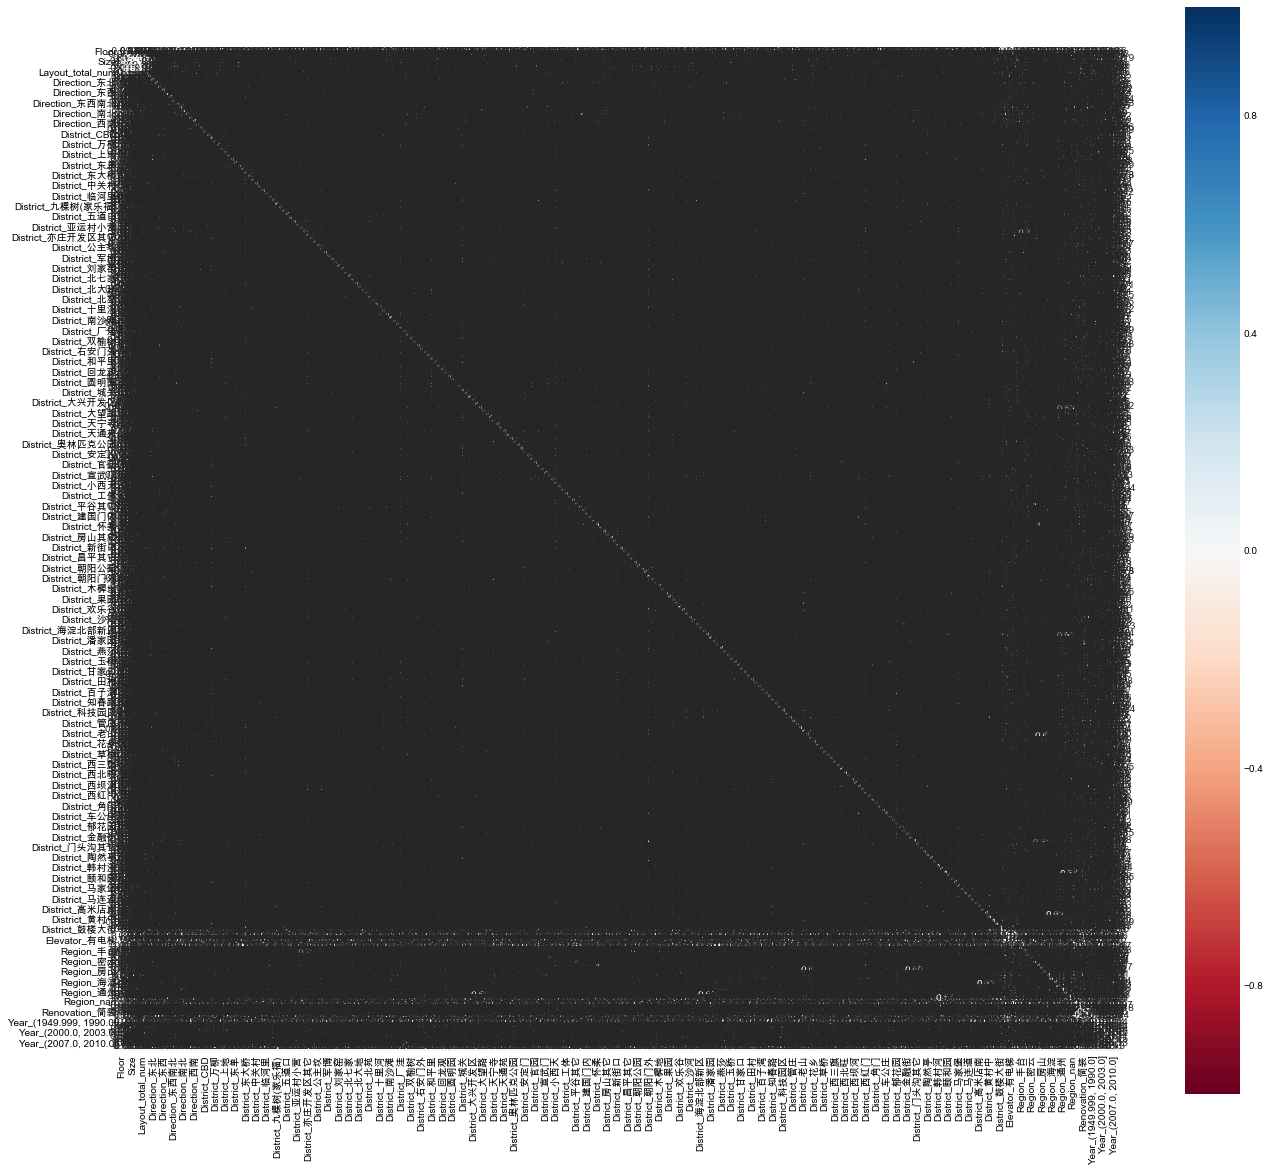

In [65]:
# data_color
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
# plt.title('xxx')
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white',annot=True)